In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv("/content/dataset(1).csv")
labels = pd.read_csv("/content/labels.csv")

In [ ]:
names = data.columns
name = []

In [ ]:
for i in range(0, 448, 1):
  if data.iloc[:, i].dtype == 'object':
    name.append(names[i])

In [ ]:
name

['idEye', 'En.Anterior.']

In [ ]:
data = data.drop(labels = ["Unnamed: 0", "idEye", "En.Anterior."], axis = 1)

<Axes: >

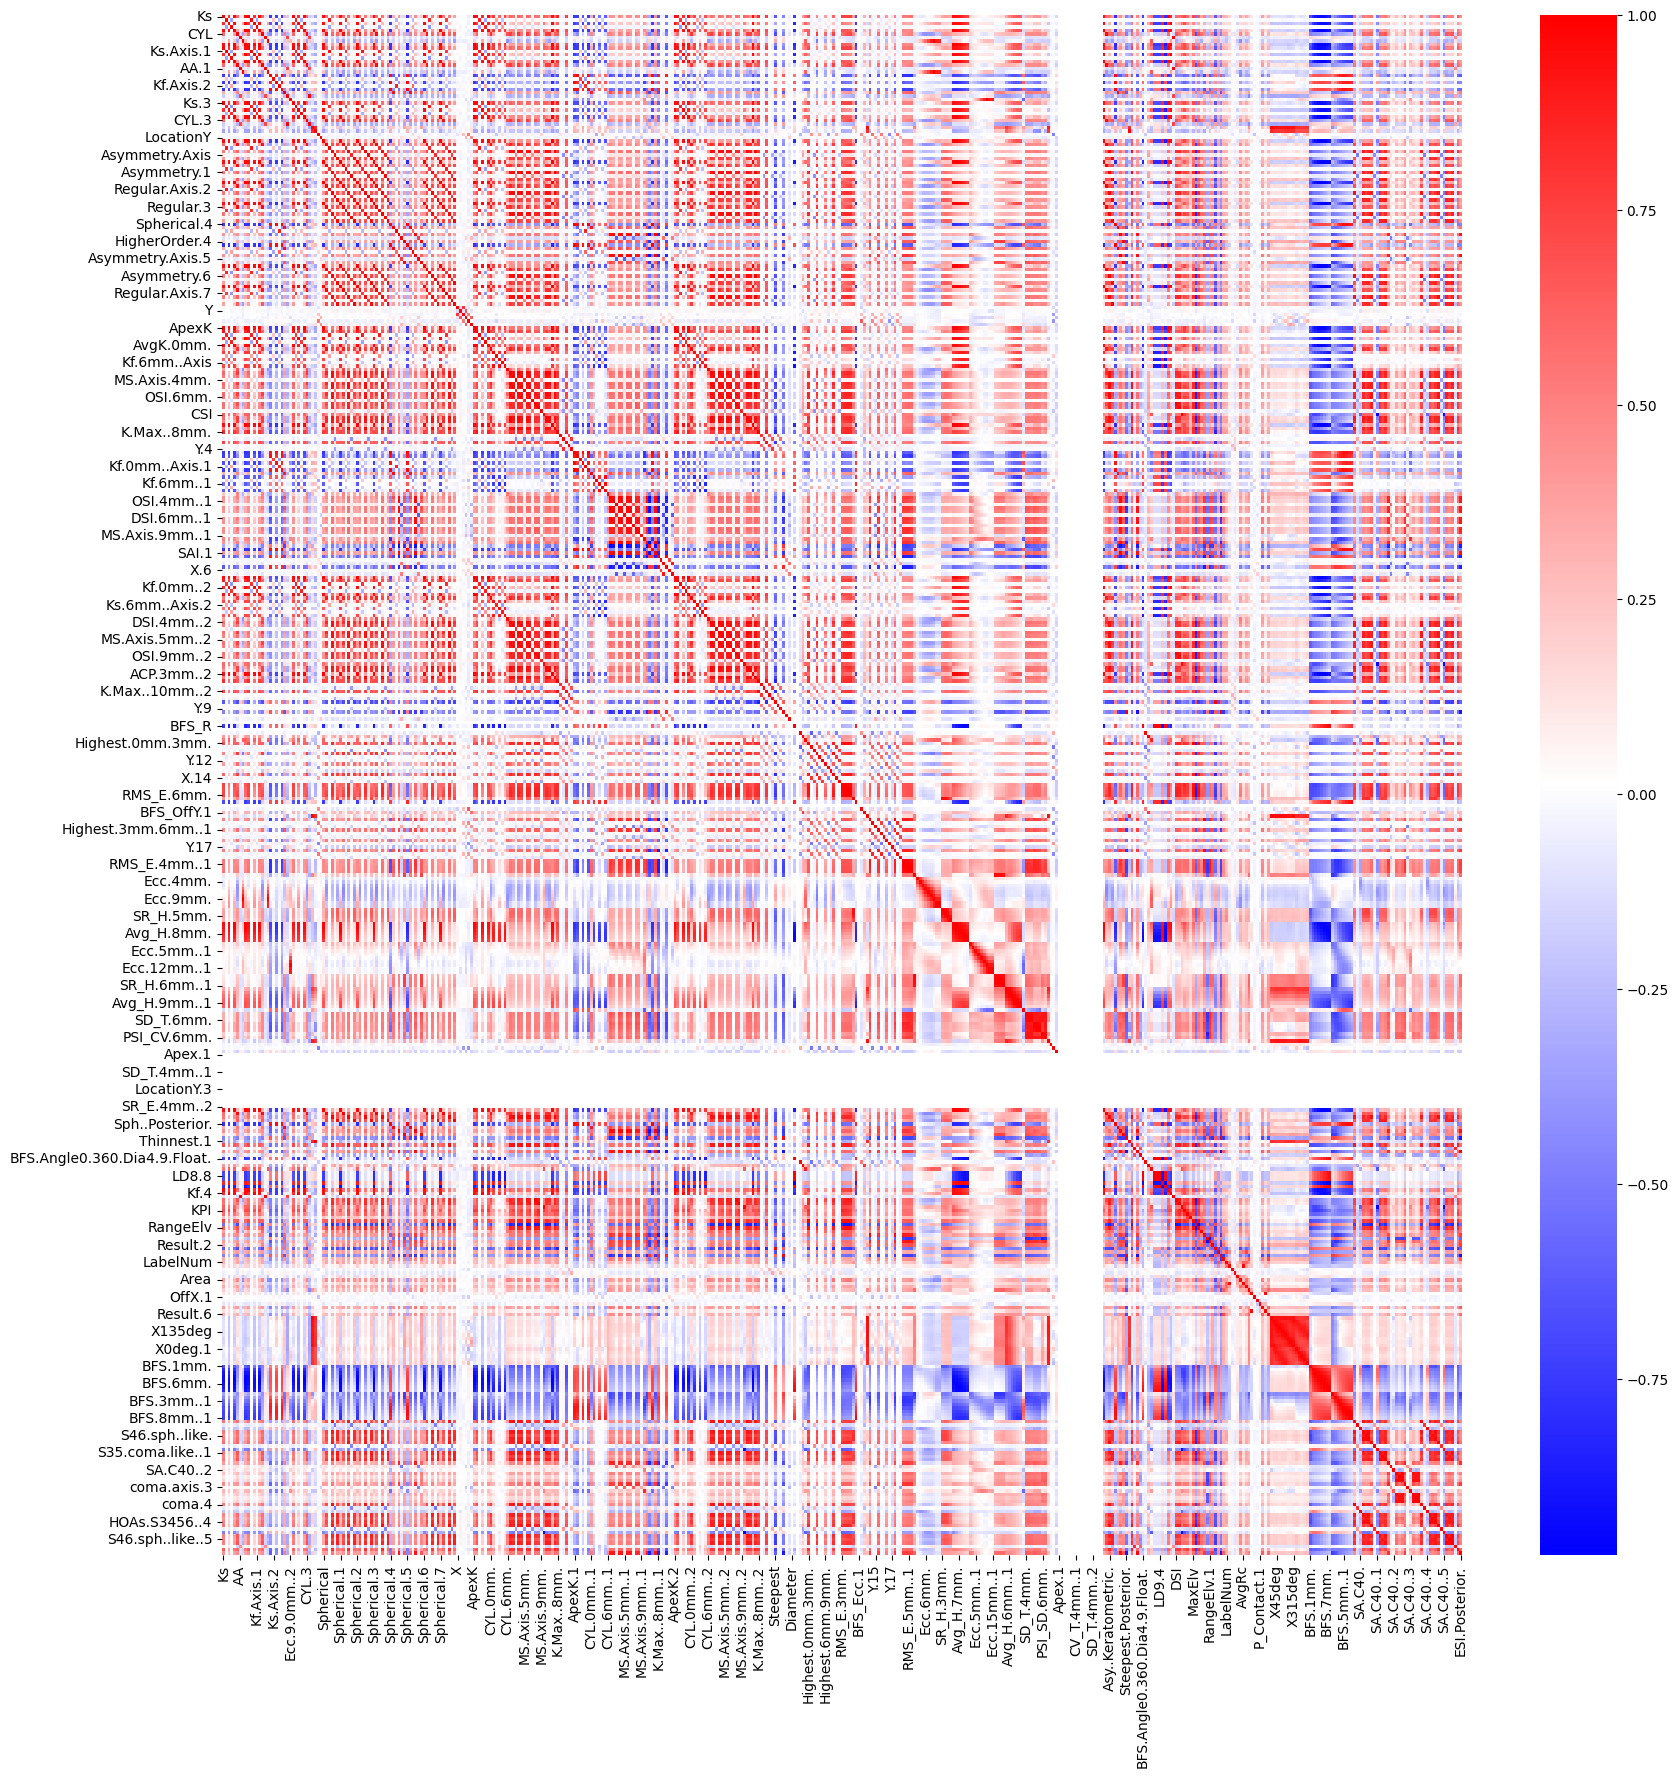

In [ ]:
plt.figure(figsize = (20, 20))
sns.heatmap(data.corr(), cmap = "bwr")

In [ ]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           3162 non-null   int64 
 1   Data.PLOS_One.idEye  3162 non-null   object
 2   clster_labels        3162 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 74.2+ KB


In [ ]:
labels

,Unnamed: 0,Data.PLOS_One.idEye,clster_labels
0,1,1OS(Left),1
1,2,1OD(Right),2
2,3,2OD(Right),2
3,4,4OS(Left),1
4,5,4OD(Right),2
...,...,...,...
3157,3158,1812OD(Right),2
3158,3159,1813OS(Left),2
3159,3160,1813OD(Right),2
3160,3161,1814OS(Left),2


In [ ]:
x = data
y = labels.clster_labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2529 entries, 1598 to 1776
Columns: 445 entries, Ks to ESI.Posterior.
dtypes: float64(319), int64(126)
memory usage: 8.6 MB


In [ ]:
model_0 = Pipeline([
    ("preprocessing", MinMaxScaler()),
    ("model", KNeighborsClassifier())
])
model_0.fit(X_train, y_train)
print(f"Test accuracy: {model_0.score(X_test, y_test)*100}%")

Test accuracy: 87.83570300157977%


In [ ]:
model_1 = Pipeline([
    ("preprocessing", MinMaxScaler()),
    ("model", DecisionTreeClassifier())
])
model_1.fit(X_train, y_train)
print(f"Test accuracy: {model_1.score(X_test, y_test)*100}%")

Test accuracy: 89.88941548183254%


In [ ]:
model_2 = Pipeline([
    ("preprocessing", MinMaxScaler()),
    ("model", LogisticRegression())
])
model_2.fit(X_train, y_train)
print(f"Test accuracy: {model_2.score(X_test, y_test)*100}%")

Test accuracy: 94.62875197472354%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
